In [569]:
path = r'G:\My Drive\Darkmatter\Measurements'
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
import math
from IPython.display import HTML
dir_list = os.listdir()
os.chdir(path)

In [570]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]



def AVG(lst,n):
    lst=list(lst)
    new_lst=[]
    for i in range(n,len(lst)-n):
        new_lst.append(np.average(lst[i-n:i+n]))
    return np.array(new_lst)

In [571]:

def read_data_from_one(n):
    df = pd.read_csv('{}_{}.csv'.format(n,0))
    column_VELO = np.array(df.iloc[:, 0])
    column_TEMP = np.array(df.iloc[:, 1])
    column_TEMP =np.where((column_TEMP<25),0,column_TEMP)
    #column_VELO =np.where((column_TEMP<25),0,column_VELO)
    return column_VELO,column_TEMP


def read_data_from_four(n):
    df = pd.read_csv('-{}_{}.csv'.format(n,0)) 
    column_VELO = np.array(df.iloc[:, 0])
    column_TEMP = np.array(df.iloc[:, 1])
    column_TEMP =np.where((column_TEMP<25),0,column_TEMP)
    return column_VELO,column_TEMP


In [572]:
def find_pi_RIGHT(df):
    temp = df[1]
    Velo = df[0]
    picks=sp.signal.find_peaks(temp, height=None,
                        threshold=None,
                        distance=None,
                        prominence=None,
                        width=None,
                        wlen=None,
                        rel_height=0.5,
                        plateau_size=None)
    return Velo[picks[0][-1]]
      
    
def find_pi_Left(df):
    temp = df[1]
    Velo = df[0]
    picks=sp.signal.find_peaks(temp, height=None,
                        threshold=None,
                        distance=None,
                        prominence=None,
                        width=None,
                        wlen=None,
                        rel_height=0.5,
                        plateau_size=None)
    return Velo[picks[0][0]]

In [573]:
radiusplus = []
velocityplus = []
radiusmin = []
velocitymin = []



results_tuples_plus = []
results_tuples_plus_err = []
results_tuples_minus = []
results_tuples_minus_err = []



results_tuples_plus = []
results_tuples_minus = []

R_errmax=[]   
V_errmax=[]


R_errmin=[]   
V_errmin=[]


results_tuples_mean_err = []



error_R=[]
error_V=[]


dict_resu_90={}
dict_resu_180={}


In [574]:
for i in range(1,91):
     
    df=(read_data_from_one(i))
    velo_max = find_pi_RIGHT(df)
    R = 8*np.sin(np.radians(i))
    veloc = velo_max + 220 * np.sin(np.radians(i))
    velocityplus.append(veloc)
    radiusplus.append(R)
    
    
    
    
    
    results_tuples_plus.append((R,veloc))
    
    inx_max_plus = tuple(np.argwhere(df[0]==velo_max))[0]
    nvelo_plus = df[0][inx_max_plus[0]:]
    ntemp_plus = df[1][inx_max_plus[0]:]
    HW_temp_plus = find_nearest(ntemp_plus, ntemp_plus[0]/2)
    HW_inx_plus = tuple(np.argwhere(ntemp_plus == HW_temp_plus))[0]
    HW_velo_plus = nvelo_plus[HW_inx_plus]
    
    

    R_err_plus = 8*np.pi*np.cos(np.radians(i))/(180*math.sqrt(12))
    velo_err_plus = math.sqrt((abs(nvelo_plus[0]-HW_velo_plus)/math.sqrt(2*np.log(2)))**2 +
                              (220*np.pi*np.cos(np.radians(i)))**2/(180**2*12))

    
    
    
    results_tuples_plus_err.append((R_err_plus, velo_err_plus))
    
    R_errmax.append(R_err_plus)  
    V_errmax.append(velo_err_plus)
    

In [575]:
for i in range(1,91):
    
    
    df=(read_data_from_four(i))
    velo_max = find_pi_Left(df)
    R = 8*np.sin(np.radians(-i))
    veloc = velo_max + 220 * np.sin(np.radians(-i))
    
    velocitymin.append(veloc)
    radiusmin.append(R)
    
    
    results_tuples_minus.append((-R,-veloc))
    
    

    inx_max_min = tuple(np.argwhere(df[0]==velo_max))[0]
    nvelo_min = df[0][:inx_max_min[0]]
    ntemp_min = df[1][:inx_max_min[0]]
    HW_temp_min = find_nearest(ntemp_min, ntemp_min[len(ntemp_min)-1]/2)
    HW_inx_min = tuple(np.argwhere(ntemp_min == HW_temp_min))[0]
    HW_velo_min = nvelo_min[HW_inx_min]


    R_err_min = 8*np.pi*np.cos(np.radians(i))/(180*math.sqrt(12))
    velo_err_min = math.sqrt((abs(nvelo_min[len(ntemp_min)-1]-HW_velo_min)/math.sqrt(2*np.log(2)))**2 +
                             (220*np.pi*np.cos(np.radians(-i)))**2/(180**2*12))
    results_tuples_minus_err.append((R_err_min, velo_err_min))


    R_errmin.append(R_err_min)  
    V_errmin.append(velo_err_min)


In [576]:
for i in range(0,90):
    
    R_err_mean = 0.5*math.sqrt(results_tuples_plus_err[i][0]**2 + 
                               results_tuples_minus_err[89-i][0]**2)
    
    velo_err_mean = 0.5 * math.sqrt(results_tuples_plus_err[i][1]**2 + 
                                    results_tuples_minus_err[89-i][1]**2)
    
    results_tuples_mean_err.append((R_err_mean, velo_err_mean)) 
    
    error_R.append(R_err_mean)
    error_V.append(velo_err_mean)
    


radiusmin = np.array(radiusmin)
radiusplus = np.array(radiusplus)
velocitymin = np.array(velocitymin)
velocityplus = np.array(velocityplus)


radiusmin_2 = -1*radiusmin
velocitymin_2 = -1*velocitymin
velocitymin_2 = np.flip(velocitymin_2)
velo_err_2 = np.flip(V_errmin)
R_err_2 = np.flip(R_errmin)


In [577]:
for i in range(len(radiusplus)):
    velocity_mean = np.sum([velocitymin_2,velocityplus],axis=0)/2

In [578]:
Radius = np.concatenate((np.flip(np.array(radiusmin)),np.array(radiusplus)))
velocity = np.concatenate((np.flip(np.array(velocitymin)),np.array(velocityplus)))
error_all_R = np.concatenate((np.flip(np.array(R_errmin)),np.array(R_errmax)))
error_all_V = np.concatenate((np.flip(np.array(V_errmin)),np.array(V_errmax)))

In [591]:
list_of_col_for_results_90 = ['0-90 data_R',      '0-90 data_V',     '-90-0 data_R',
                              '-90-0 data_V',     'flip -90-0 R' ,   'flip -90-0 V', 
                              'MEAN DATA',        '0-90 R err',      '-90-0 R err',  
                              'flip R err',       'Mean_err_R',      '0-90 Velo err',  
                              '-90-0 Velo err',   'flip Velo err',   'MEAN_ERR_V']



list_of_results_90 = [radiusplus,      velocityplus,     radiusmin,
                      velocitymin,     radiusmin_2,      velocitymin_2,   
                      velocity_mean,   R_errmax,         R_errmin,   
                      R_err_2,         error_R,          V_errmax,     
                      V_errmin,        velo_err_2,       error_V]



list_of_col_for_results_180 = [ 'all_range_data_R',
                               'all_range_data_V',
                                'all data err R',
                              'all data err V' ]

list_of_results_180 = [Radius,
                       velocity,
                       error_all_R,
                       error_all_V]



for i in range(len(list_of_results_90)):
    dict_resu_90[list_of_col_for_results_90[i]] = list_of_results_90[i] 
    
for i in range(len(list_of_results_180)):
    dict_resu_180[list_of_col_for_results_180[i]] = list_of_results_180[i] 

    
    
DF90 = pd.DataFrame(dict_resu_90)    
DF180 = pd.DataFrame(dict_resu_180)  
print(np.array(DF90['-90-0 Velo err']))

[  2.85015774   2.07162694   6.22619613  11.43233289   6.22571688
   4.51313563   7.95403821   6.22455509   5.36462078   6.22349066
   4.5096658   23.65761284   9.68854528  10.55836698   8.81811185
   2.8338009    9.68633354  14.04421607   8.815394     8.81462859
   9.68360948  11.42505146   9.6820714    9.68126152   4.49025363
   8.80938676   4.48648961   7.93814705   8.80639669  15.78438657
  14.91018559  13.16291581   7.93224576  10.54356834  12.28761402
  11.41401484   9.66876916   7.92586117   7.92454304  14.90409026
   8.7927574    7.92053488   7.04906662   4.44847668  10.53264963
   7.04450486   7.91377328   7.91242357   6.17001426   6.16829778
   5.29784751  20.1431695    5.29391949   8.77708689   7.90319889
   8.77479127   9.64706726   8.77255895   9.64506962  10.51805839
   7.89589286   7.02160731   6.14764087   9.64041295   9.63954863
   8.76447558 358.86802976   7.01459828  14.01022819  13.13478077
  12.25933387   7.88502829  10.5084452    5.2606031    9.63243273
  11.38189

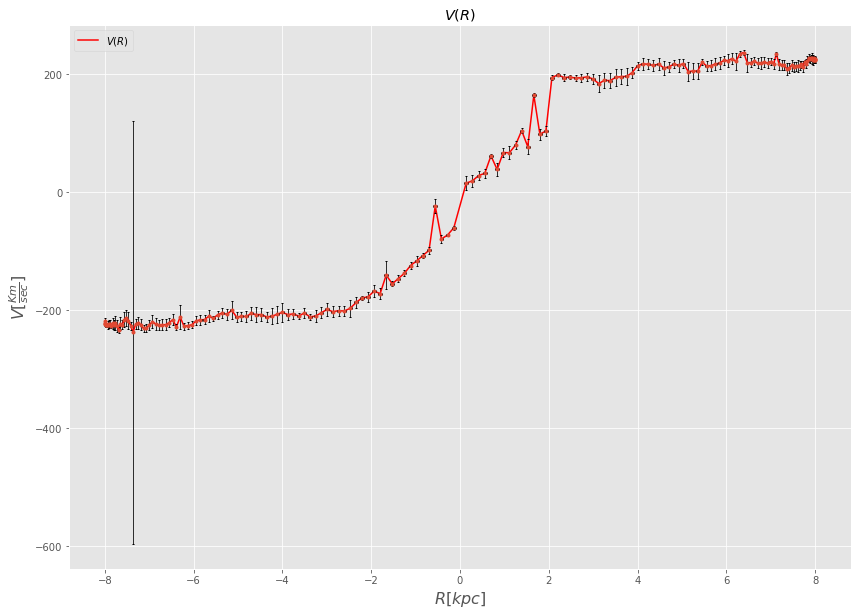

In [589]:
#################plot all with error bar


fig, ax1 = plt.subplots(figsize=(14,10))
plt.style.use('ggplot')


ax1.plot(DF180['all_range_data_R'],DF180['all_range_data_V'],color='r',label=r'$V(R)$')
ax1.errorbar(DF180['all_range_data_R'],
             DF180['all_range_data_V'],
             yerr=DF180['all data err V'],
             xerr=DF180['all data err R'],
             fmt='.',
              ecolor='black', elinewidth=0.8, capsize=1.2,
              barsabove=False, lolims=False, uplims=False,
              xlolims=False, xuplims=False, errorevery=1,
              capthick=None,data=None)



ax1.set(title=r'$V(R)$')
ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
ax1.legend(loc='upper left')



plt.savefig('G:\Shared drives\LAB\מעבדה ב2\ניסויים\חומר אפל\Errorbar2.png')

In [581]:
###############plot only negative with error bar



# fig, ax1 = plt.subplots(figsize=(14,10))
# plt.style.use('ggplot')

# ax1.plot(radiusmin,velocitymin,color='b',label=r'$-V(R)$')
# ax1.errorbar(radiusmin,velocitymin, yerr=V_errmin, xerr=(R_errmin), fmt='.',
#               ecolor='black', elinewidth=0.8, capsize=1.2,
#               barsabove=False, lolims=False, uplims=False,
#               xlolims=False, xuplims=False, errorevery=1,
#               capthick=None,data=None)



# ax1.set(title=r'$V(R)$')
# ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
# ax1.legend(loc='upper left')


In [582]:
##################plot only positive with error bar



# fig, ax1 = plt.subplots(figsize=(14,10))
# plt.style.use('ggplot')

# ax1.plot(radiusplus,velocityplus,color='b',label=r'$-V(R)$')
# ax1.errorbar(radiusplus,velocityplus, yerr=V_errmax, xerr=R_errmax, fmt='.',
#               ecolor='black', elinewidth=0.8, capsize=1.2,
#               barsabove=False, lolims=False, uplims=False,
#               xlolims=False, xuplims=False, errorevery=1,
#               capthick=None,data=None)


# ax1.set(title=r'$V(R)$')
# ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
# ax1.legend(loc='upper left')

In [583]:
##################plot only mean with error bar

# fig, ax1 = plt.subplots(figsize=(14,10))
# plt.style.use('ggplot')


# # ax1.plot(radiusplus,velocity_mean,color='b',label=r'$AVG$')
# # ax1.errorbar( radiusplus, velocity_mean, yerr=error_V, xerr=error_R, fmt='.',
# #               ecolor='black', elinewidth=0.8, capsize=1.2,
# #               barsabove=False, lolims=False, uplims=False,
# #               xlolims=False, xuplims=False, errorevery=1,
# #               capthick=None,data=None)


# ax1.set(title=r'$V(R)$')
# ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
# ax1.legend(loc='upper left')

In [584]:
####################Avg example

# fig, ax1 = plt.subplots(figsize=(14,10))
# plt.style.use('ggplot')

# ax1.set(title=r'$Average$')
# ax1.plot(AVG(Radius,10),AVG(velocity,10),color='r',label=r'$V(R)$')
# ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
# ax1.legend(loc=(0.01,0.89))


# ax1.set(title=r'$V(R)$')
# ax1.set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# ax1.set_xlabel(r'$R[kpc]$',fontsize='16')
# ax1.legend(loc='upper left')

In [585]:
################ plot a line for cutting place


# plt.plot([2.1, 2.1], [0, 250], '--', lw=2, label=r'$Areas\quadCut$')

In [586]:
#########################saving - be cearfull to not save in the same name as another good plot

# plt.savefig('G:\Shared drives\LAB\מעבדה ב2\ניסויים\חומר אפל\Errorbar2.png')

In [587]:
# index_to_cut=None
# for i in range(len(radiusplus)):
#     if radiusplus[i]<2.1 and radiusplus[i+1]>2.1:
#         index_to_cut = i


# velocityplus_SR,velocitymin_2_SR,velocity_mean_SR = velocityplus[:index_to_cut+1],velocitymin_2[:index_to_cut+1],velocity_mean[:index_to_cut+1]

# velocityplus_BR,velocitymin_2_BR,velocity_mean_BR = velocityplus[index_to_cut:],velocitymin_2[index_to_cut:],velocity_mean[index_to_cut:] 
# radiusplus_SR=radiusplus[:index_to_cut+1]
# radiusplus_BR=radiusplus[index_to_cut:]


In [588]:
#cut plot


# fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
# plt.style.use('ggplot')



# axs[0].plot(radiusplus_SR, velocity_mean_SR,color='g')
# axs[1].plot(radiusplus_BR, velocity_mean_BR,color='g')
# axs[0].set_title(r'$Small \quad radius \quad data$')
# axs[1].set_title(r'$Big \quad radius \quad data$')
# #axs[0].title('Small R linear')
# fig.suptitle('Cuting to areas')
# axs[0].set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# axs[0].set_xlabel(r'$R[kpc]$',fontsize='16')





# axs[1].set_ylabel(r'$V[\frac{Km}{sec}]$',fontsize='16')
# axs[1].set_xlabel(r'$R[kpc]$',fontsize='16')
# plt.savefig('G:\Shared drives\LAB\מעבדה ב2\ניסויים\חומר אפל\CUTdata.png')